In [60]:
import os
import time
import pandas as pd
import numpy as np
import pathlib
from io import StringIO
from Bio import SeqIO
from Bio.Cluster import distancematrix
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
import subprocess
from matplotlib import pyplot as plt

Parameters for ncbi commandline blast to nt database

#percentage identity 95%
- PER_ID = 95

#Expect value (E) for saving hits
- E_VAL=0.001
- NUM_READS=50000

The following contains the hits for which an accession number was found in the NCBI nt database

In [80]:
PRJ='PRJNA605983'
DATA_PATH=f'/mnt/1TB_0/Data/Assembly/{PRJ}/'
SRA='SRR11092059'
BLAST_PATH=DATA_PATH+SRA+'/blast/'

DB='nt'
#DB='gsa_bsl_nt_db'

#percentage identity 95%
PER_ID = 95
#Expect value (E) for saving hits
E_VAL=0.001

NUM_READS=50000

In [81]:
PER_ID = 95
E_VAL=0.001
RESULT_FILE=f'{BLAST_PATH}{SRA}_blast_{DB}_PCT{PER_ID}_E{E_VAL}_run2.csv'

In [24]:
def clean_string(s):
    s = s.replace(',', '').strip()
    return s

In [84]:
#df = pd.read_csv(RESULT_FILE)
def get_df(result_file):
    ids=[]
    titles=[]
    accessions=[]
    hit_ids=[]
    lengths=[]
    qry_lengths=[]
    with open(result_file, 'r') as temp_f:
        for line in temp_f:
            ids.append(clean_string(line.split('id:')[1].split('title:')[0]))
            titles.append(clean_string(line.split('title:')[1].split('accession:')[0]))
            accessions.append(clean_string(line.split('accession:')[1].split('hit_id:')[0]))
            hit_ids.append(clean_string(line.split('hit_id:')[1].split('length:')[0]))
            lengths.append(clean_string(line.split('length:')[1].split('query_length')[0]))
            qry_lengths.append(clean_string(line.split('query_length')[1]))


    df=pd.DataFrame(list(zip(ids, titles, accessions, hit_ids, lengths, qry_lengths)),
                  columns=['id','title', 'accession','hit_id','length','qry_length'])
    return  df, accessions


### SRR110920959

#### nt database

In [83]:
df, accessions=get_df(RESULT_FILE)

In [31]:
df.head()

,id,title,accession,hit_id,length,qry_length
0,35390684,gi|1036030233|gb|AH006396.2| Homo sapiens chro...,AH006396,gi|1036030233|gb|AH006396.2|,27197,150
1,26254512,gi|1812627517|gb|CP048993.1| Saccharomyces pas...,CP048993,gi|1812627517|gb|CP048993.1|,1135585,150
2,21882800,gi|1784143451|gb|MN826541.1| Phyllobacterium i...,MN826541,gi|1784143451|gb|MN826541.1|,1426,150
3,69723289,gi|768858278|gb|CP006458.1| Saccharomyces cere...,CP006458,gi|768858278|gb|CP006458.1|,2458844,150
4,44464200,gi|1848010746|dbj|AP023165.1| Felis catus Senz...,AP023165,gi|1848010746|dbj|AP023165.1|,65441144,150


In [88]:
def get_val_count(accessions):
    values, counts = np.unique(accessions, return_counts=True)
    idx = np.argsort(counts)[::-1]
    values = np.array(values)[idx]
    counts = np.array(counts)[idx]
    return values, counts

In [39]:
for v,c in zip(values, counts):
    print(v, c)

CP049009 788
CP048993 587
MT280028 191
CP006458 118
MT645452 80
CP040435 75
XR_004669553 71
CP045551 63
MK280367 56
CP048984 56
MN849868 53
CP050073 53
MT649488 52
LT630003 48
CP034495 42
MG321589 42
CP034516 41
CP034492 38
CP034496 37
CP034494 35
CP034493 35
MT644937 32
CP034522 31
MT550662 30
CP035765 29
CP059378 27
CP051081 25
AP023165 25
CP034499 25
CP048736 23
NG_069004 23
MT420738 22
MK280359 22
AP019749 21
CP048986 21
CP048988 21
CP034501 21
KY962518 19
CP034500 18
CP065668 16
CP047875 16
CP046092 15
NC_045054 14
CP048994 13
LR134301 13
CP028358 13
CP015202 13
MK880484 12
XR_004548217 12
CP037858 12
MN244181 11
NG_069003 10
CP048995 10
CP048985 9
CP051467 9
CP022561 9
MT644876 9
CP042578 8
CP046083 8
MN644913 8
CP014060 8
MN961670 8
CP048996 8
CP021381 8
CP034510 7
XR_004618536 7
MK834528 7
MN342165 7
AP023475 7
CP031058 7
XR_004642737 7
CP046094 7
CP040439 6
MG660548 6
MT255023 6
CP068089 6
AC270241 6
MT145310 6
CP045291 6
CP054880 6
CP047310 6
AP023476 6
MT510545 6
AP023477 5


AP023368 1
AP023184 1
AP023169 1
AP022867 1
AP022630 1
AP022498 1
AP022324 1
AP019740 1
AP018718 1
AP018664 1
AP018532 1
NG_015844 1
AP023535 1
AP001179 1
AL805961 1
AP000779 1
AP000941 1
AP003116 1
AP003050 1
AP003042 1
AP002851 1
AP002799 1
AP002789 1
AP002761 1
AP002748 1
AY497006 1
AP002407 1
AP002353 1
AP001981 1
AP001485 1
AP001324 1
AP001282 1
AL953897 1
AL592504 1
AP003773 1
AL593856 1
AP003460 1
AP003419 1
AL772226 1
AL732596 1
AL731556 1
AL714001 1
AL691458 1
AL691426 1
AL683826 1
AL671879 1
AL663023 1
AL645817 1
AL645730 1
AL645565 1
AL606465 1
AL606462 1
AL596262 1
NG_016747 1
AC135506 1
NG_013373 1
AL160173 1
AL162732 1
AL162386 1
AL161935 1
AL161907 1
AL161636 1
AL161457 1
AL161439 1
AL160287 1
AL160171 1
NG_013343 1
AL160165 1
AL159995 1
AL159172 1
AL158077 1
AL158072 1
AL157882 1
AL157786 1
AL157709 1
AL139392 1
AL139343 1
AL139159 1
AL136096 1
AL139102 1
AL139092 1
AL138788 1
AL138756 1
AL137848 1
AL136452 1
AL136306 1
AL139142 1
AL136224 1
AL135778 1
AL133513 1
AL1333

In [55]:
l=df.loc[df.accession=='CP049009', 'title'].tolist()

In [56]:
l[0]

'gi|1812633156|gb|CP049009.1| Saccharomyces pastorianus strain CBS 1483 chromosome SeXII'

In [90]:
def get_titles(df, values):
    titles=[]
    for v in values:
        l=df.loc[df.accession==v, 'title'].tolist()
        titles.append(l[0])
    return titles

In [58]:
titles[0]

'gi|1812633156|gb|CP049009.1| Saccharomyces pastorianus strain CBS 1483 chromosome SeXII'

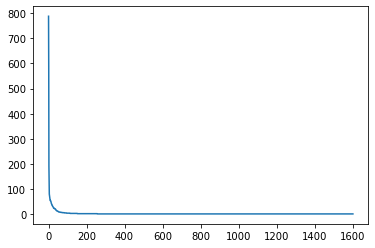

In [61]:
plt.plot(counts)

Blast matches from most to least common: Title, accession, count

In [63]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1812633156|gb|CP049009.1| Saccharomyces pastorianus strain CBS 1483 chromosome SeXII, CP049009, 788
gi|1812627517|gb|CP048993.1| Saccharomyces pastorianus strain CBS 1483 chromosome ScXII, CP048993, 587
gi|1828316253|gb|MT280028.1| Saccharomyces cerevisiae strain Y5 small subunit ribosomal RNA gene partial sequence, MT280028, 191
gi|768858278|gb|CP006458.1| Saccharomyces cerevisiae YJM693 chromosome XII sequence, CP006458, 118
gi|1859922263|gb|MT645452.1| Torulaspora delbrueckii strain P7FP10 internal transcribed spacer 1 partial sequence; 5.8S ribosomal RNA gene complete sequence; and internal transcribed spacer 2 partial sequence, MT645452, 80
gi|1777103196|gb|CP040435.1| Stenotrophomonas maltophilia strain PEG-42 chromosome complete genome, CP040435, 75
gi|1848982279|ref|XR_004669553.1| PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904) rRNA, XR_004669553, 71
gi|1851357885|gb|CP045551.1| Pseudomonas putida strain 15420352 chromosome complete genome, CP045551, 63
gi|16904894

In [71]:
human_titles = [i for i in titles if 'human' in i.lower() or 'homo sapien' in i.lower()]

In [72]:
len(human_titles)

995

In [73]:
human_titles

['gi|1690489457|gb|MK280367.1| Homo sapiens lncAB371.6 lncRNA gene complete sequence',
 'gi|1858626016|gb|MN849868.1| Homo sapiens isolate PNG99 haplogroup Q1a mitochondrion complete genome',
 'gi|1690489449|gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence',
 'gi|1238280724|gb|KY962518.1| Homo sapiens external transcribed spacer 18S ribosomal RNA gene internal transcribed spacer 1 5.8S ribosomal RNA gene internal transcribed spacer 2 28S ribosomal RNA gene and external transcribed spacer complete sequence',
 'gi|1909942456|dbj|AP023475.1| Homo sapiens DNA chromosome 15 nearly complete genome',
 'gi|1850794348|gb|MG660548.1| Homo sapiens isolate Kum1615 haplogroup D5c1a mitochondrion complete genome',
 'gi|1015809855|gb|AC270241.1| Homo sapiens BAC clone CH17-338K16 from chromosome 7 complete sequence',
 'gi|1909942457|dbj|AP023476.1| Homo sapiens DNA chromosome 16 nearly complete genome',
 'gi|1909942458|dbj|AP023477.1| Homo sapiens DNA chromosome 17 nearly complete

In [76]:
flu_titles = [i for i in titles if 'influenza' in i.lower()]

In [77]:
flu_titles

['gi|1774782216|gb|MN686727.1| Influenza A virus (A/wuhu/1/2014(H7N9)) segment 4 hemagglutinin (HA) gene complete cds',
 'gi|1851723164|dbj|AP022867.1| Haemophilus influenzae 2018-Y40 DNA complete genome']

In [78]:
vec_titles = [i for i in titles if 'vector' in i.lower() or 'primer' in i.lower()]

In [79]:
vec_titles

['gi|1840390084|gb|MT084773.1| Cloning vector pXJ133 complete sequence',
 'gi|1604994536|gb|MK433565.1| Cloning vector pVAX1-BMP2/7 (-) complete sequence',
 'gi|1600730981|gb|MK484108.1| Firefly luciferase reporter vector pGL4Zc complete sequence',
 'gi|1821706900|gb|MN271957.1| Cloning vector pGEM-T_blanc_GFPco8g_tGAL_URA3locus_tTK complete sequence']

#### GSA virus database hits

ncbi commandline blast to gsa_virus database

### SRR11092059

In [92]:
result_file='SRR11092059_blast_gsa_bsl_nt_db_PCT95_E0.001_run2.csv'
df, accessions=get_df(BLAST_PATH+result_file)

In [93]:
df.head()

,id,title,accession,hit_id,length,qry_length
0,72558701,9 BIRC5 [organism=Homo sapiens] [GeneID=332] [...,9,9,11383,150
1,21855544,gb|MF164268.1| Homo sapiens clone BAC JH12 gen...,MF164268,gb|MF164268.1|,44249,150
2,50554957,gb|MT241668.1| Leopoldamys sabanus voucher MZF...,MT241668,gb|MT241668.1|,15973,150
3,65708708,gb|MF164268.1| Homo sapiens clone BAC JH12 gen...,MF164268,gb|MF164268.1|,44249,150
4,59903447,gb|MF164268.1| Homo sapiens clone BAC JH12 gen...,MF164268,gb|MF164268.1|,44249,150


In [94]:
values, counts=get_val_count(accessions)
titles=get_titles(df, values)

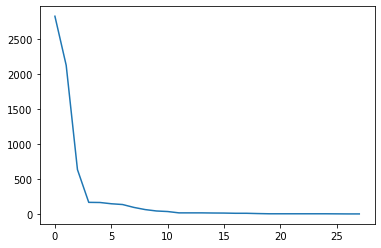

In [95]:
plt.plot(counts)

In [96]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 2822
gb|MT241668.1| Leopoldamys sabanus voucher MZF1958 mitochondrion complete genome, MT241668, 2122
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 633
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 166
gb|MK562374.1| |UNVERIFIED: Infectious bronchitis virus genomic sequence|Iran||Avian coronavirus|, MK562374, 164
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 146
gb|MK280367.1| Homo sapiens lncAB371.6 lncRNA gene complete sequence, MK280367, 135
gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 94
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 63
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 43
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 35
gb|JN950623.1| Mus musculus targeted non-conditional lacZ-tagged mutant allele Herc1:tm1e(EUCOMM)Wtsi; transgenic, JN9

NB BLAST of PEDV reads on NCBI returs Esherichia coli

PLAST of Pig DNA FP326762.5 returns reads with 97.97% match

### SRR11092060

1000 randon reads local cammandline b;ast to gsa_virus db

#### gsa_virus database

In [100]:
bpath=DATA_PATH+'SRR11092060/blast/'
result_file='SRR11092060_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)

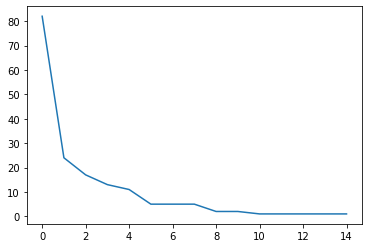

In [101]:
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [102]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 82
gb|MT241668.1| Leopoldamys sabanus voucher MZF1958 mitochondrion complete genome, MT241668, 24
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 17
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 13
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 11
gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 5
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 5
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 5
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 2
3 FGF2 [organism=Homo sapiens] [GeneID=2247] [chromosome=4], 3, 2
gb|MH926031.1| Spodoptera frugiperda rhabdovirus complete genome, MH926031, 1
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 1
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 1
4 TERT [organism=H

#### nt database

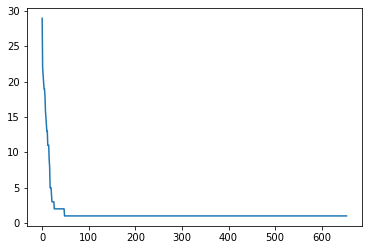

In [108]:
bpath=DATA_PATH+'SRR11092060/blast/'
result_file='SRR11092060_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [109]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1549095790|gb|CP034516.1| Eukaryotic synthetic construct chromosome 13, CP034516, 29
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 22
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20, CP034499, 21
gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 20
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 19
gi|1858626016|gb|MN849868.1| Homo sapiens isolate PNG99 haplogroup Q1a mitochondrion complete genome, MN849868, 19
gi|1848982279|ref|XR_004669553.1| PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904) rRNA, XR_004669553, 18
gi|1549097453|gb|CP034522.1| Eu

See .png of Mus Musculus BLAST results

### SRR11092061

#### gsa_virus database

In [103]:
bpath=DATA_PATH+'SRR11092061/blast/'
result_file='SRR11092061_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)

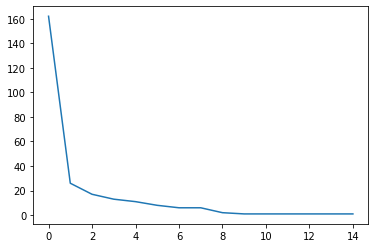

In [104]:
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [105]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 162
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 26
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 17
gb|MT241668.1| Leopoldamys sabanus voucher MZF1958 mitochondrion complete genome, MT241668, 13
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 11
gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 8
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 6
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 6
12 SOD1 [organism=Homo sapiens] [GeneID=6647] [chromosome=21], 12, 2
gb|MK562374.1| |UNVERIFIED: Infectious bronchitis virus genomic sequence|Iran||Avian coronavirus|, MK562374, 1
gb|MK280367.1| Homo sapiens lncAB371.6 lncRNA gene complete sequence, MK280367, 1
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 1
6 CAV1 [organism=Homo sapiens] [G

#### nt database

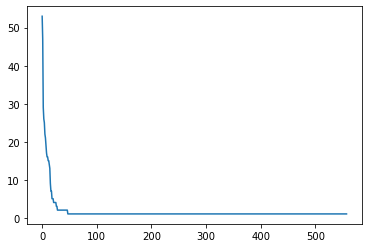

In [106]:
bpath=DATA_PATH+'SRR11092061/blast/'
result_file='SRR11092061_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [107]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1848982279|ref|XR_004669553.1| PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904) rRNA, XR_004669553, 53
gi|1858626016|gb|MN849868.1| Homo sapiens isolate PNG99 haplogroup Q1a mitochondrion complete genome, MN849868, 47
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 29
gi|1690489449|gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 26
gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 25
gi|1835280168|gb|CP051081.1| Aspergillus flavus strain K49 chromosome 7, CP051081, 22
gi|1848010746|dbj|AP023165.1| Felis catus Senzu DNA chromosome: E1 American Shorthair breed, AP023165, 21
gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP0344

## SRR11092062

Lane 02

#### gsa_virus

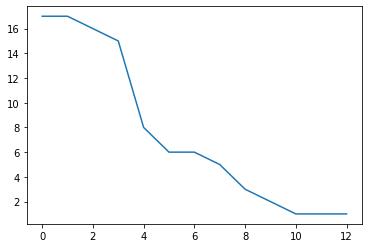

In [111]:
bpath=DATA_PATH+'SRR11092062/blast/'
result_file='SRR11092062_L02_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [112]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MT241668.1| Leopoldamys sabanus voucher MZF1958 mitochondrion complete genome, MT241668, 17
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 17
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 16
gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 15
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 8
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 6
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 6
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 5
12 SOD1 [organism=Homo sapiens] [GeneID=6647] [chromosome=21], 12, 3
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 2
gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 1
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 1
4 TERT [organism=Homo sapiens] [GeneID=7015] [chromosome=5], 4, 1


#### nt

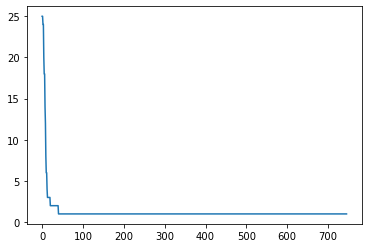

In [113]:
bpath=DATA_PATH+'SRR11092062/blast/'
result_file='SRR11092062_L02_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [114]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 25
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 25
gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 24
gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 24
gi|1549095790|gb|CP034516.1| Eukaryotic synthetic construct chromosome 13, CP034516, 20
gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19, CP034522, 18
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20, CP034499, 18
gi|154899

Note quite a few Gossypium reads (contamination in HZAU Gossipum datasets previously identified)

Lane 04

#### gsa_virus

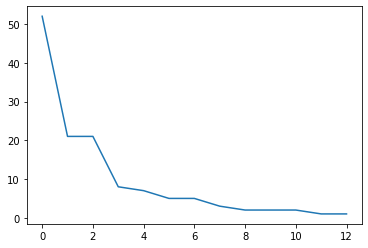

In [116]:
bpath=DATA_PATH+'SRR11092062/blast/'
result_file='SRR11092062_L04_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [117]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 52
gb|MT241668.1| Leopoldamys sabanus voucher MZF1958 mitochondrion complete genome, MT241668, 21
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 21
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 8
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 7
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 5
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 5
3 FGF2 [organism=Homo sapiens] [GeneID=2247] [chromosome=4], 3, 3
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 2
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 2
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 2
gb|MW669242.1| |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/OH-CDC-21866699/2021 complete genome||USA|Homo sapiens|Severe acute respiratory syndrom

#### nt

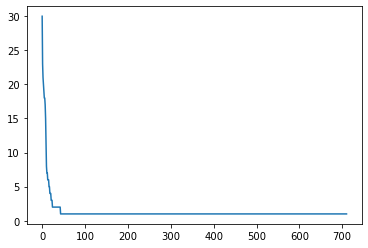

In [118]:
bpath=DATA_PATH+'SRR11092062/blast/'
result_file='SRR11092062_L04_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [119]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 30
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 23
gi|1548994297|gb|CP034501.1| Eukaryotic synthetic construct chromosome 22 >gi|1549098833|gb|CP034526.1| Eukaryotic synthetic construct chromosome 22, CP034501, 21
gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19, CP034522, 20
gi|1548994292|gb|CP034496.1| Eukaryotic synthetic construct chromosome 18 >gi|1549097232|gb|CP034521.1| Eukaryotic synthetic construct chromosome 18, CP034496, 19
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 18
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034

### SRR11092063

#### gsa_virus

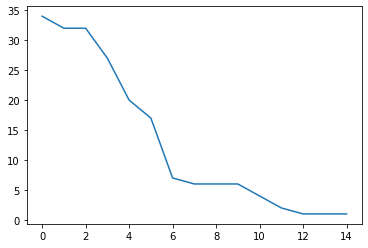

In [120]:
bpath=DATA_PATH+'SRR11092063/blast/'
result_file='SRR11092063_L02_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [121]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MT241668.1| Leopoldamys sabanus voucher MZF1958 mitochondrion complete genome, MT241668, 34
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 32
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 32
gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 27
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 20
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 17
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 7
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 6
12 SOD1 [organism=Homo sapiens] [GeneID=6647] [chromosome=21], 12, 6
11 BAX [organism=Homo sapiens] [GeneID=581] [chromosome=19], 11, 6
3 FGF2 [organism=Homo sapiens] [GeneID=2247] [chromosome=4], 3, 4
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 2
gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 1
gb|MK279923.1| Homo sapiens lncAB599.3 ln

#### nt

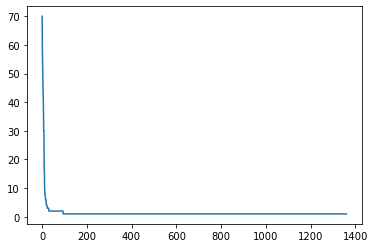

In [122]:
bpath=DATA_PATH+'SRR11092063/blast/'
result_file='SRR11092063_L02_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [123]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 70
gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19, CP034522, 58
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 54
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20, CP034499, 48
gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 44
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 41
gi|1548994297|gb|CP034501.1| Eukaryotic synthetic construct chromosome 22 >gi|1549098833|gb|CP034

### SRR11092064

#### gsa_virus

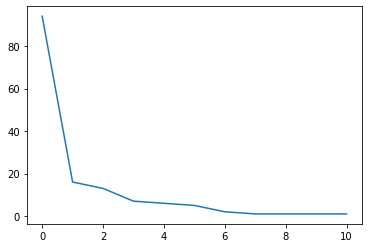

In [124]:
bpath=DATA_PATH+'SRR11092064/blast/'
result_file='SRR11092064_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [125]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 94
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 16
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 13
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 7
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 6
gb|MK280359.1| Homo sapiens lncAB370.3 lncRNA gene complete sequence, MK280359, 5
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 2
gb|KJ997912.1| Enterobacteria phage MED1 complete genome, KJ997912, 1
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 1
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 1
3 FGF2 [organism=Homo sapiens] [GeneID=2247] [chromosome=4], 3, 1


#### nt

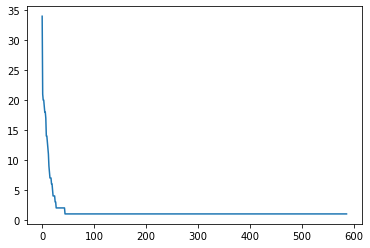

In [126]:
bpath=DATA_PATH+'SRR11092064/blast/'
result_file='SRR11092064_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [127]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1848982279|ref|XR_004669553.1| PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904) rRNA, XR_004669553, 34
gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 21
gi|1549095790|gb|CP034516.1| Eukaryotic synthetic construct chromosome 13, CP034516, 20
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 20
gi|1848010746|dbj|AP023165.1| Felis catus Senzu DNA chromosome: E1 American Shorthair breed, AP023165, 19
gi|1690489457|gb|MK280367.1| Homo sapiens lncAB371.6 lncRNA gene complete sequence, MK280367, 18
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20, CP034499, 18
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eu

### SRR11092056

#### gsa_virus

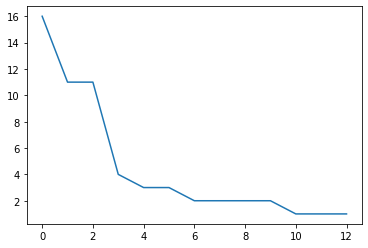

In [128]:
bpath=DATA_PATH+'SRR11092056/blast/'
result_file='SRR11092056_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [129]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 16
gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 11
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 11
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 4
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 3
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 3
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 2
4 TERT [organism=Homo sapiens] [GeneID=7015] [chromosome=5], 4, 2
12 SOD1 [organism=Homo sapiens] [GeneID=6647] [chromosome=21], 12, 2
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 2
gb|DQ079883.1| Coliphage ID45 complete genome, DQ079883, 1
8 KCNH2 [organism=Homo sapiens] [GeneID=3757] [chromosome=7], 8, 1
3 FGF2 [organism=Homo sapiens] [GeneID=2247] [chromosome=4], 3, 1


#### nt

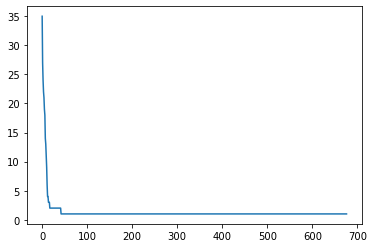

In [130]:
bpath=DATA_PATH+'SRR11092056/blast/'
result_file='SRR11092056_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [131]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 35
gi|1549095790|gb|CP034516.1| Eukaryotic synthetic construct chromosome 13, CP034516, 27
gi|1548994292|gb|CP034496.1| Eukaryotic synthetic construct chromosome 18 >gi|1549097232|gb|CP034521.1| Eukaryotic synthetic construct chromosome 18, CP034496, 24
gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 22
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 21
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 19
gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19, CP034522, 18
gi|154899

### SRR1092057

#### gsa_virus

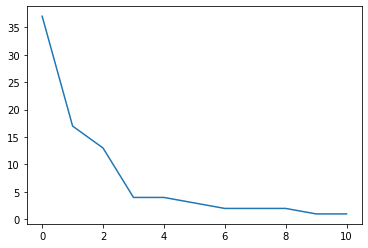

In [132]:
bpath=DATA_PATH+'SRR11092057/blast/'
result_file='SRR11092057_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [133]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 37
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 17
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 13
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 4
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 4
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 3
gb|MK279923.1| Homo sapiens lncAB599.3 lncRNA gene complete sequence, MK279923, 2
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 2
4 TERT [organism=Homo sapiens] [GeneID=7015] [chromosome=5], 4, 2
gb|AF274751.1| Bacteriophage S13 complete genome, AF274751, 1
11 BAX [organism=Homo sapiens] [GeneID=581] [chromosome=19], 11, 1


#### nt

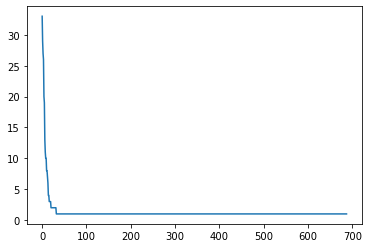

In [134]:
bpath=DATA_PATH+'SRR11092057/blast/'
result_file='SRR11092057_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [135]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 33
gi|1549095790|gb|CP034516.1| Eukaryotic synthetic construct chromosome 13, CP034516, 29
gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 27
gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 26
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 20
gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19, CP034522, 19
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20, CP034499, 13
gi|154899

### SRR11092058

#### gsa_virus

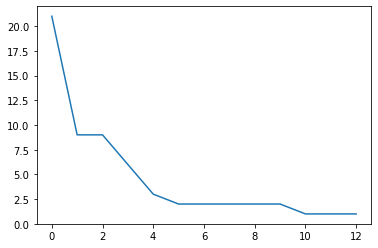

In [137]:
bpath=DATA_PATH+'SRR11092058/blast/'
result_file='SRR11092058_blast_gsa_bsl_nt_db_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [138]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence, MF164268, 21
7 CFTR [organism=Homo sapiens] [GeneID=1080] [chromosome=7], 7, 9
2 ABCG2 [organism=Homo sapiens] [GeneID=9429] [chromosome=4], 2, 9
1 RPS6KA1 [organism=Homo sapiens] [GeneID=6195] [chromosome=1], 1, 6
10 TP53 [organism=Homo sapiens] [GeneID=7157] [chromosome=17], 10, 3
gb|DQ079883.1| Coliphage ID45 complete genome, DQ079883, 2
emb|AJ289709.1| Human endogenous retrovirus H HERV-H/env62 proviral copy clone 231E12, AJ289709, 2
9 BIRC5 [organism=Homo sapiens] [GeneID=332] [chromosome=17], 9, 2
6 CAV1 [organism=Homo sapiens] [GeneID=857] [chromosome=7], 6, 2
11 BAX [organism=Homo sapiens] [GeneID=581] [chromosome=19], 11, 2
gb|AF274751.1| Bacteriophage S13 complete genome, AF274751, 1
4 TERT [organism=Homo sapiens] [GeneID=7015] [chromosome=5], 4, 1
3 FGF2 [organism=Homo sapiens] [GeneID=2247] [chromosome=4], 3, 1


#### nt

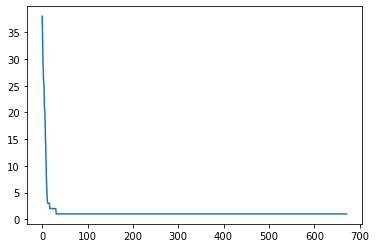

In [139]:
bpath=DATA_PATH+'SRR11092058/blast/'
result_file='SRR11092058_blast_nt_PCT95_E0.001.csv'
df, accessions=get_df(bpath+result_file)
values, counts=get_val_count(accessions)
titles=get_titles(df, values)
plt.plot(counts)

In [140]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1549095790|gb|CP034516.1| Eukaryotic synthetic construct chromosome 13, CP034516, 38
gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16, CP034494, 33
gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14, CP034492, 29
gi|1548994291|gb|CP034495.1| Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17, CP034495, 26
gi|1548994289|gb|CP034493.1| Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15, CP034493, 25
gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19, CP034522, 21
gi|1548994295|gb|CP034499.1| Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20, CP034499, 20
gi|154899